<a href="https://colab.research.google.com/github/kashishdatta/Deep-Learning-A-Z/blob/main/MegaStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SELF ORGANISING MAPS 2

PART 1 - SOM

Importing the Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the Dataset

In [10]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

Training the SOM

In [12]:
pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

Visualizing the Results

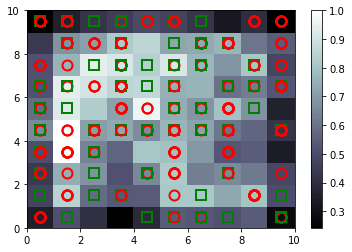

In [14]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o', 's']
colors=['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

Finding the Frauds

In [17]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,7)], mappings[(1,6)]), axis=0)
frauds = sc.inverse_transform(frauds)

PART 2 - GOING FROM UNSUPERVISED TO SUPERVISED LEARNING

Importing keras packages and libraries

In [18]:
from keras.models import Sequential
from keras.layers import Dense

Creating Matrix of features

In [19]:
customers = dataset.iloc[:, 1:].values

Creating a Dependant Variable

In [20]:
isfraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    isfraud[i] = 1

Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

Building the ANN

In [23]:
classifier = Sequential()

In [26]:
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim=15))

In [27]:
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [29]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
classifier.fit(customers, isfraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 933us/step - loss: 0.0390 - accuracy: 0.9942
Epoch 2/2
690/690 [==============================] - 1s 931us/step - loss: 0.0301 - accuracy: 0.9942


Predicting probability of Frauds

In [33]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1], y_pred), axis=1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [34]:
y_pred

array([[1.56214230e+07, 4.59070179e-05],
       [1.57997850e+07, 1.05174549e-04],
       [1.56548590e+07, 5.03689051e-04],
       ...,
       [1.56921370e+07, 4.51931655e-02],
       [1.58137180e+07, 5.18367290e-02],
       [1.57163470e+07, 6.71872795e-02]])